In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import preprocess_kgptalkie as ps

In [2]:
df1 = pd.read_csv('business_data.csv')
df2 = pd.read_csv('education_data.csv')
df3 = pd.read_csv('entertainment_data.csv')
df4 = pd.read_csv('sports_data.csv')
df5 = pd.read_csv('technology_data.csv')
df = pd.concat([df1,df2,df3,df4,df5],ignore_index=True)
print(df.head())

                                           headlines  \
0  Nirmala Sitharaman to equal Morarji Desai’s re...   
1  ‘Will densify network, want to be at least no....   
2  Air India group to induct an aircraft every si...   
3  Red Sea woes: Exporters seek increased credit ...   
4  Air India group to induct a plane every 6 days...   

                                         description  \
0  With the presentation of the interim budget on...   
1  'In terms of market share, we aim to double it...   
2  Air India currently has 117 operational aircra...   
3  Rising attacks forced shippers to consider the...   
4  Apart from fleet expansion, 2024 will also see...   

                                             content  \
0  Sitharaman, the first full-time woman finance ...   
1  The merger of Tata group’s budget airlines Air...   
2  The Air India group plans to induct one aircra...   
3  Indian exporters have asked the central govern...   
4  The Air India group plans to induct one air

In [3]:
df.columns

Index(['headlines', 'description', 'content', 'url', 'category'], dtype='object')

In [4]:
import seaborn as sns

import re
import string
import nltk
import spacy

In [5]:
df.head()

,headlines,description,content,url,category
0,Nirmala Sitharaman to equal Morarji Desai’s re...,With the presentation of the interim budget on...,"Sitharaman, the first full-time woman finance ...",https://indianexpress.com/article/business/bud...,business
1,"‘Will densify network, want to be at least no....","'In terms of market share, we aim to double it...",The merger of Tata group’s budget airlines Air...,https://indianexpress.com/article/business/avi...,business
2,Air India group to induct an aircraft every si...,Air India currently has 117 operational aircra...,The Air India group plans to induct one aircra...,https://indianexpress.com/article/business/avi...,business
3,Red Sea woes: Exporters seek increased credit ...,Rising attacks forced shippers to consider the...,Indian exporters have asked the central govern...,https://indianexpress.com/article/business/red...,business
4,Air India group to induct a plane every 6 days...,"Apart from fleet expansion, 2024 will also see...",The Air India group plans to induct one aircra...,https://indianexpress.com/article/business/avi...,business


In [9]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\VIJAYA
[nltk_data]     KUMAR\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import joblib

In [15]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

nlp = spacy.load("en_core_web_sm")




[nltk_data] Downloading package stopwords to C:\Users\VIJAYA
[nltk_data]     KUMAR\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [16]:

def preprocess_text(text):
    if pd.isnull(text):
        return ""
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    text = re.sub(rf"[{re.escape(string.punctuation)}]", "", text)
    doc = nlp(text)
    tokens = [token.lemma_ for token in doc if token.text not in stop_words and not token.is_punct and not token.is_space]
    return " ".join(tokens)



In [18]:
# Combine headline, description, and content
df['text'] = df['headlines'] + " " + df['description'] + " " + df['content']


In [22]:
from tqdm import tqdm
tqdm.pandas()



In [23]:
df['text'] = df['text'].progress_apply(preprocess_text)


  0%|          | 0/10000 [00:00<?, ?it/s]

100%|██████████| 10000/10000 [03:42<00:00, 44.98it/s]


In [24]:
print(df[['text', 'category']].head())


                                                text  category
0  nirmala sitharaman equal morarji desai ’s reco...  business
1  densify network want least city pair air india...  business
2  air india group induct aircraft every six day ...  business
3  red sea woe exporter seek increase credit frei...  business
4  air india group induct plane every day through...  business


In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC

In [29]:
from sklearn.pipeline import Pipeline
clf = Pipeline([('Tfidf', TfidfVectorizer()), ('clf', LinearSVC())])

In [30]:

vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_features=10000)
X = vectorizer.fit_transform(df['text'])
y = df['category']


In [32]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC

clf = Pipeline([
('Tfidf', TfidfVectorizer()),
('clf', LinearSVC())
])

In [37]:
vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_features=10000)
X = vectorizer.fit_transform(df['text'])
y = df['category']

In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)



In [40]:
X = df["text"]
y = df["category"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report


In [43]:
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


In [44]:
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)
y_pred_nb = nb_model.predict(X_test_tfidf)

print("Naive Bayes Report:\n", classification_report(y_test, y_pred_nb))


Naive Bayes Report:
                precision    recall  f1-score   support

     business       0.97      0.96      0.96       400
    education       1.00      0.98      0.99       400
entertainment       0.99      0.98      0.99       400
       sports       0.98      0.99      0.99       400
   technology       0.95      0.96      0.96       400

     accuracy                           0.98      2000
    macro avg       0.98      0.98      0.98      2000
 weighted avg       0.98      0.98      0.98      2000



In [47]:
# Import necessary libraries
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

# Example text data (replace this with your actual text dataset)
# X = df['text']  # Replace with your actual feature data (e.g., 'text')
# y = df['category']  # Replace with your actual target labels (e.g., 'category')

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Transform the text data into numerical data using TfidfVectorizer
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Train Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)

# Predict on test data
y_pred_nb = nb_model.predict(X_test_tfidf)

# Evaluate the model
print("Naive Bayes Report:\n", classification_report(y_test, y_pred_nb))


Naive Bayes Report:
                precision    recall  f1-score   support

     business       0.97      0.96      0.96       400
    education       1.00      0.98      0.99       400
entertainment       0.99      0.98      0.99       400
       sports       0.98      0.99      0.99       400
   technology       0.95      0.96      0.96       400

     accuracy                           0.98      2000
    macro avg       0.98      0.98      0.98      2000
 weighted avg       0.98      0.98      0.98      2000



In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

# Example text data (replace this with your actual text dataset)
# X = df['text']  # Replace with your actual feature data (e.g., 'text')
# y = df['category']  # Replace with your actual target labels (e.g., 'category')

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Transform the text data into numerical data using TfidfVectorizer
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train_tfidf, y_train)

# Predict on test data
y_pred_rf = rf_model.predict(X_test_tfidf)

# Evaluate the model
print("Random Forest Report:\n", classification_report(y_test, y_pred_rf))


Random Forest Report:
                precision    recall  f1-score   support

     business       0.95      0.96      0.96       400
    education       0.98      0.98      0.98       400
entertainment       1.00      0.97      0.98       400
       sports       0.98      0.98      0.98       400
   technology       0.93      0.94      0.93       400

     accuracy                           0.97      2000
    macro avg       0.97      0.97      0.97      2000
 weighted avg       0.97      0.97      0.97      2000



In [55]:
from sklearn.preprocessing import LabelEncoder
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Assuming your raw text data is in 'X' and labels are in 'y'
X = df['text']  # Example text column
y = df['category']  # Example label column

# Encoding the labels (target) into integers
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Splitting the data into train/test sets
X_train, X_test, y_train_encoded, y_test_encoded = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

# Applying TfidfVectorizer on the training and testing data
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Verify the types
print(f"X_train_tfidf type: {type(X_train_tfidf)}")
print(f"y_train_encoded type: {type(y_train_encoded)}")


X_train_tfidf type: <class 'scipy.sparse._csr.csr_matrix'>
y_train_encoded type: <class 'numpy.ndarray'>


In [59]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import joblib

In [60]:
vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_features=10000)
X = vectorizer.fit_transform(df['text'])
y = df['category']

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [62]:
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
print("Logistic Regression Report:\n", classification_report(y_test, y_pred_lr))

Logistic Regression Report:
                precision    recall  f1-score   support

     business       0.97      0.96      0.97       400
    education       1.00      0.98      0.99       400
entertainment       0.99      0.99      0.99       400
       sports       0.99      0.99      0.99       400
   technology       0.95      0.97      0.96       400

     accuracy                           0.98      2000
    macro avg       0.98      0.98      0.98      2000
 weighted avg       0.98      0.98      0.98      2000



In [63]:
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)
print("Naive Bayes Report:\n", classification_report(y_test, y_pred_nb))


Naive Bayes Report:
                precision    recall  f1-score   support

     business       0.98      0.96      0.97       400
    education       1.00      0.98      0.99       400
entertainment       0.99      0.99      0.99       400
       sports       0.99      0.99      0.99       400
   technology       0.95      0.97      0.96       400

     accuracy                           0.98      2000
    macro avg       0.98      0.98      0.98      2000
 weighted avg       0.98      0.98      0.98      2000



In [64]:
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Report:\n", classification_report(y_test, y_pred_rf))

Random Forest Report:
                precision    recall  f1-score   support

     business       0.96      0.96      0.96       400
    education       0.99      0.98      0.98       400
entertainment       0.99      0.96      0.98       400
       sports       0.98      0.98      0.98       400
   technology       0.91      0.95      0.93       400

     accuracy                           0.97      2000
    macro avg       0.97      0.97      0.97      2000
 weighted avg       0.97      0.97      0.97      2000



In [65]:
clf = Pipeline([('tfidf',TfidfVectorizer()),('clf',LinearSVC())])

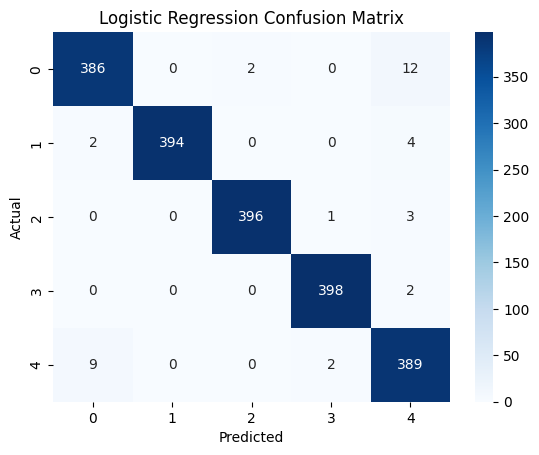

In [66]:
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d', cmap='Blues')
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [67]:
pipeline = Pipeline([
('tfidf', TfidfVectorizer()),
('clf', LogisticRegression())
])

In [73]:
new_data = ["This is a new text example."]
predictions = pipeline.predict(new_data)
print(predictions)






[1]


In [70]:
joblib.dump(lr_model, 'logistic_model.joblib')
joblib.dump(vectorizer, 'tfidf_vectorizer.joblib')


['tfidf_vectorizer.joblib']

In [71]:
from joblib import load

# Load the saved model and vectorizer
lr_model = load('logistic_model.joblib')
vectorizer = load('tfidf_vectorizer.joblib')
